# Lab 2

In [1]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#import seqs.fa 
def read_fasta(input):
    #read fasta file into list of lists, with first index being name and second sequence
    fasta = []
    for i in SeqIO.parse(input, "fasta"):
        temp = []
        temp.append(i.id)
        temp.append(i.seq)
        fasta.append(temp)
    return(fasta)

seqs = read_fasta('seqs.fa')

In [3]:
aligned = read_fasta('seqs.aligned.fa')

Looks like the sequences in seqs.fa look very similar to each other, but after aligning the two files together, the seqs.aligned.fa shows that there are now gaps inserted into the sequences to ensure a maximum alignment score

In [4]:
tree = Phylo.read('tree.nwk','newick')
Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

There are a few clusters, but many of the sequences look like they did not get inputted into the tree cleanly. For example, the hu 43,48,44,46,14,31, and 32 sequences seem to fit into the tree quite well, but others such as rh 64,57,51,49,53,50,52,and 39 don't seem to fit nicely

it also looks like hu.39 is very distantly related from sequences such as hu. 32 and 31

#### Blast fun

will blast hu.32, hu. 14, and hu. 39

In [5]:
cluster1id = ['hu.14','hu.31','hu.32','rh.43']
cluster2id = ['hu.46','hu.44','hu.48','hu.43','rh.62','rh.48','rh.55','rh.54','cy.2','rh.37','rh.36','rh.35','rh.13','cy.5','cy.4','cy.6','cy.3']
cluster3id = ['hu.42','rh.38','hu.41','hu.66','hu.40','hu.37','hu.67','rh.2','rh.40','hu.6','hu.17','bb.2','bb.1','rh.10']
cluster4id = ['pi.1','pi.2','pi.3']
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
for i in range(len(aligned)):
    l = aligned[i][0]
    s = aligned[i][1]
    if l == 'hu.31' or l == 'cy.2' or l == 'bb.1' or l == 'rh.50' or l == 'pi.1':
        print(l + '\n\n')
        print(s + '\n\n')
    for j in cluster1id:
        if j == l:
            cluster1.append(s)
    for j in cluster2id:
        if j == l:
            cluster2.append(s)
    for j in cluster3id:
        if j == l:
            cluster3.append(s)
    for j in cluster4id:
        if j == l:
            cluster4.append(s)

hu.31


ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACACTCTCTCTGAAGGAATAAGACAGTGGTGGAAGCTCAAACCTGGCCCCCCACCACCAAAGCCCGCAGAGCGGCATAAGGACGACAGCAGGGGTCTTGTGCTTCCTGGGTACAAGTACCTCGGACCCGGCAACGGACTCGACAAGGGGGAGCCGGTCAACGCAGCAGACGCGGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAGGCCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCCGAGTTCCAGGAGCGGCTCAAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAAAAGAGGCTTCTTGAACCTCTTGGTCTGGTTGAGGAAGCGGCTAAGACGGCTCCTGGAAAGAAGAGGCCTGTAGAGCAGTCTCCTCAGGA---ACCGGACTCCTCCGCGGGTATTGGCAAATCGGGTTCACAGCCCGCTAAAAAGAAACTCAATTTCGGTCAGACTGGCGACACAGAGTCAGTCCCCGACCCTCAACCAATCGGAGAACCTCCCGCAGCCCCCTCAGGTGTGGGATCTCTTACAATGGCTTCAGGTGGTGGCGCACCAGTGGCAGACAATAACGAAGGTGCCGATGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCCAATGGCTGGGGGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAATCACCTCTACAAGCAAATCTCCAACAGCACATCTGGAGGATCTTCAAATGACAACGCCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTCAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCTAAGCGACTCAACTTCAAGCTCTTCAACATTCAGGTCAAAGAGGTTACGGACAACAATGG

* top hit for hu.31 is Adeno-associated virus isolate hu.31 capsid protein VP1 (cap) gene
* top hit for pi.1 is Adeno-associated virus isolate pi.1 capsid protein VP1 (cap) gene
* top hit for bb.1 is Non-human primate Adeno-associated virus isolate AAVbb.1 capsid protein (VP1) gene
* top hist for cy.2 is Non-human primate Adeno-associated virus isolate AAVcy.2 capsid protein (VP1) gene
* top hit for rh.50 is Adeno-associated virus isolate rh.50 capsid protein VP1 (cap) gene

looks like all of the genes are related to capsid protein genes for a virus, though bb and cy seem to code to a specific non-human primate version of the adeno-associated virus

these hits may not necessary be completely accurate, because it is possible that these sequences are in different organisms but have mutated in some way to align greater with a different organisms's genome. It is also possible that there are many conserved sequences in many different organisms, and that we are just by chance getting one of them rather than the actual one. For example, in the blast results for bb.1, I also found hits for rh.50 and pi.1. 

### Bar Plot + Box Plot

In [6]:
def percentgc(cluster):
    #take in a list of sequences and input gc percentage for each 
    #position for each sequence
    percentgc = []
    for i in range(len(cluster[0])):
        gc = 0
        for l in cluster:
            if 'G' in l[i] or 'C' in l[i]:
                gc += 1
        percentgc.append(gc/len(cluster))
    percentat = []
    for i in percentgc:
        percentat.append(1-i)
    return(percentgc,percentat)

c1,c1b = percentgc(cluster1)
c2,c2b = percentgc(cluster2)
c3,c3b = percentgc(cluster3)
c4,c4b = percentgc(cluster4)

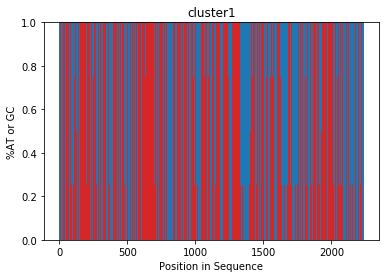

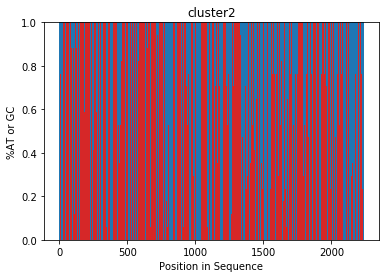

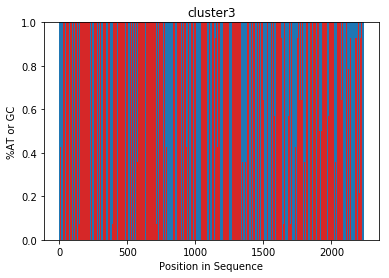

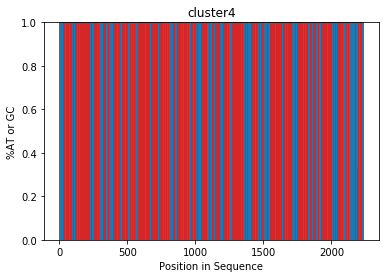

In [7]:
def plotbottom(top,bottom,name): 
    #create stacked bar plot for a top and bottom
    p1 = plt.bar(np.arange(2238), top, 1, color='#d62728')
    p2 = plt.bar(np.arange(2238), bottom, 1, bottom=top)
    plt.ylabel('%AT or GC')
    plt.xlabel('Position in Sequence')
    plt.title(name)
    plt.show()

plotbottom(c1,c1b,'cluster1')
plotbottom(c2,c2b,'cluster2')
plotbottom(c3,c3b,'cluster3')
plotbottom(c4,c4b,'cluster4')

In [93]:
cluster1r = []
cluster2r = []
cluster3r = []
cluster4r = []
for i in range(len(seqs)):
    l = seqs[i][0]
    s = seqs[i][1]
    for j in cluster1id:
        if j == l:
            cluster1r.append(s)
    for j in cluster2id:
        if j == l:
            cluster2r.append(s)
    for j in cluster3id:
        if j == l:
            cluster3r.append(s)
    for j in cluster4id:
        if j == l:
            cluster4r.append(s)

In [80]:
def box(input):
    #take in an list of sequences of different length, calculate the length of each
    # and create a boxplot of those lengths
    length = []
    for i in input:
        length.append(len(i))
    return(length)

In [99]:
length1 = box(cluster1r)
length2 = box(cluster2r)
length3 = box(cluster3r)
length4 = box(cluster4r)

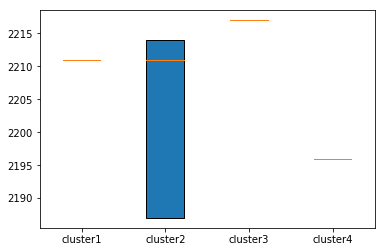

In [101]:
data = [length1,length2,length3,length4]
plt.boxplot(data,patch_artist=True,labels=['cluster1', 'cluster2', 'cluster3', 'cluster4'])
plt.show()

Looks like the clusters I chose were very similar, so that most of them had the same for all the sequences within the cluster. Cluster2 is the only cluster that I had that did not have all of the sequences be the same length.